In [53]:
import numpy as np
import open3d as o3d
from open3d_ros_helper import open3d_ros_helper as orh
import PySimpleGUI as sg
import time
import matplotlib.pyplot as plt
import copy

sample_ply_data = o3d.data.DemoCropPointCloud()
tst_pointCloud = o3d.io.read_point_cloud(sample_ply_data.point_cloud_path)
o3d.visualization.draw_geometries([tst_pointCloud])



In [62]:
def fetch_cloud_image(pointCloud, RX=0, RY=0, RZ=0):
    tmp_Rot = pointCloud.get_rotation_matrix_from_xyz((np.degrees(RX), np.degrees(RY), np.degrees((RZ))))
    tmp_cloud = copy.deepcopy(pointCloud)  #To avoid overwriting the original point cloud
    tmp_cloud.rotate(tmp_Rot, center=(0, 0, 0))
    vis = o3d.visualization.Visualizer() 
    vis.create_window(visible=False, width=640, height=480) 
    vis.add_geometry(tmp_cloud) 
    vis.poll_events() 
    vis.update_renderer() 
    color = vis.capture_screen_float_buffer(True) 
    vis.destroy_window() 
    color = (255.0 * np.asarray(color)).astype(np.uint8)
    return color

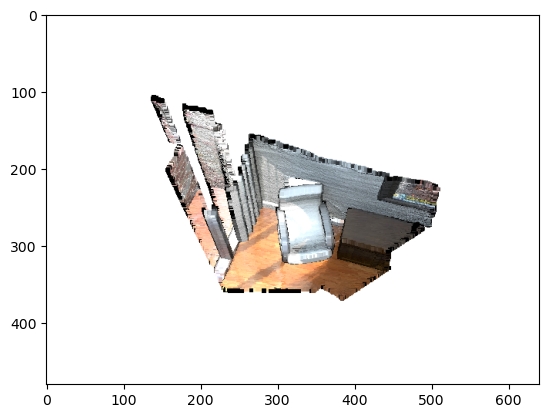

In [61]:
color = fetch_cloud_image(tst_pointCloud, RX = -45)
plt.imshow(color) 
plt.show() 